<a href="https://colab.research.google.com/github/esuarezs/CRISP-DM_F1/blob/main/Trabajo_Base_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CRISP-DM Fase de Entendimiento de los datos.**

Base: Negligencia Médica





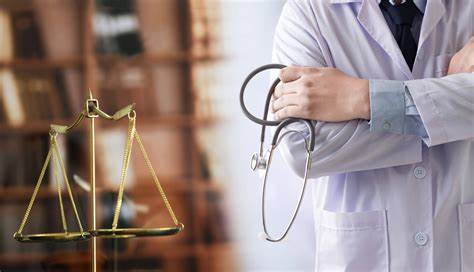

In [2]:

negligenciamed <- read.csv("medmal_pos.csv",sep = ",")

Información de las columnas.


In [3]:
#columnas
str(negligenciamed)

'data.frame':	3400 obs. of  13 variables:
 $ GRCODE            : int  669 669 669 669 669 669 669 669 669 669 ...
 $ GRNAME            : chr  "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" ...
 $ AccidentYear      : int  1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 ...
 $ DevelopmentYear   : int  1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 ...
 $ DevelopmentLag    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ IncurLoss_F2      : int  121905 112211 103226 99599 96006 90487 82640 80406 78920 78511 ...
 $ CumPaidLoss_F2    : int  2716 24576 43990 59722 71019 76354 76792 77207 77588 77656 ...
 $ BulkLoss_F2       : int  97966 64117 39008 20736 13599 10577 3762 2105 819 407 ...
 $ EarnedPremDIR_F2  : int  129104 129104 129104 129104 129104 129104 129104 129104 129104 129104 ...
 $ EarnedPremCeded_F2: int  -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 ...
 $ EarnedPremNet_F2  : int  135318 135318 135318 135318 135318 135318 135318 135318 135

In [ ]:
?system

Se modifica el nombre de las columnas


In [4]:
negligenciamed.v1 <- read.csv("medmal_pos.csv",sep = ",",
                         col.names=c("codigo","GRNAME","AccidentYear","AccidentYear","AccidentYear",
                                     "Incurridos","CumPaidLoss_F2 ","BulkLoss_F2"," EarnedPremDIR_F2",
                                     "  EarnedPremCeded_F2","EarnedPremNet_F2 "," Single ","PostedReserve97_F2"))


str(negligenciamed.v1)

'data.frame':	3400 obs. of  13 variables:
 $ codigo               : int  669 669 669 669 669 669 669 669 669 669 ...
 $ GRNAME               : chr  "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" ...
 $ AccidentYear         : int  1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 ...
 $ AccidentYear.1       : int  1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 ...
 $ AccidentYear.2       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Incurridos           : int  121905 112211 103226 99599 96006 90487 82640 80406 78920 78511 ...
 $ CumPaidLoss_F2.      : int  2716 24576 43990 59722 71019 76354 76792 77207 77588 77656 ...
 $ BulkLoss_F2          : int  97966 64117 39008 20736 13599 10577 3762 2105 819 407 ...
 $ X.EarnedPremDIR_F2   : int  129104 129104 129104 129104 129104 129104 129104 129104 129104 129104 ...
 $ X..EarnedPremCeded_F2: int  -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 ...
 $ EarnedPremNet_F2.    : int  135318 135318 135318 13531

In [ ]:
system("add-apt-repository -y ppa:marutter/rrutter")
system("add-apt-repository -y ppa:marutter/c2d4u")
system("apt-get update")
system("apt install -y r-cran-rstan")

In [ ]:
install.packages('ggmap')
install.packages('codetools')

In [ ]:
library("ggmap")

In [ ]:
options(repr.plot.width  = 3,
        repr.plot.height = 3)
Sys.setenv(USE_CXX14 = 1)
library("rstan") # observe startup messages
options(mc.cores = parallel::detectCores())
rstan_options(auto_write = TRUE)

In [ ]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))

In [ ]:
stanmodelcode <- "
data {
    int<lower=0> N;
    real y[N];
}

parameters {
    real mu;

}

model {
    target += normal_lpdf(mu | 0, 10);
    target += normal_lpdf(y | mu, 1);
}"

y <- rnorm(20)
dat <- list(N = 20, y = y);

fit <- stan(model_code = stanmodelcode, model_name = "example",
            data = dat, iter = 2012, chains = 8, sample_file = 'norm.csv',
            verbose = FALSE,
            refresh = -1)

print(fit)

In [ ]:
plot(fit)

In [ ]:
y <- as.matrix(read.table('https://raw.github.com/wiki/stan-dev/rstan/rats.txt', header = TRUE))
x <- c(8, 15, 22, 29, 36)
xbar <- mean(x)
N <- nrow(y)
T <- ncol(y)
rats_fit <- stan(file = 'https://raw.githubusercontent.com/stan-dev/example-models/master/bugs_examples/vol1/rats/rats.stan')


In [ ]:
rats_fit

In [ ]:
plot(rats_fit)

In [ ]:
## load APA data set, full version
data(APAFULL)
## Emond and Mason Branch-and-Bound algorithm.
## If the number of object is higher than 20, EMCons function may work for several minutes.
## Use either QuickCons, DECOR, FASTcons or FASTDECOR instead
CR=EMCons(APAFULL)

In [ ]:
TR=tabulaterows(APAFULL)
CR2=FASTcons(TR$X,TR$Wk,maxiter=5)
CR3=QuickCons(TR$X,TR$Wk)
CR4=DECOR(TR$X,TR$Wk)
#####################################
### load sports data set
#data(sports)
### FAST algorithm
#CR=FASTcons(sports,maxiter=10)
#####################################
#######################################
### load Emond and Mason data set
#data(EMD)
### matrix X contains rankings
#X=EMD[,1:15]
### vector Wk contains frequencies
#Wk=EMD[,16]
### QUICK algorithm
#CR=QuickCons(X,Wk)
#######################################

In [ ]:
data(BU)
polyplot(BU[,1:3],Wk=BU[,4])